In [56]:
import lightgbm as lgb
import numpy as np
import pandas as pd
import string
import shap
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter

from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

from utilidades.reducir_uso_memoria import reduce_mem_usage

In [2]:
def ver_dispersion(y_test, prediction, nombre):
    plt.figure(figsize=(10, 10))
    plt.scatter(y_test, prediction, alpha=0.2)
    plt.title("Dispersión de " + nombre, fontsize=25)
    plt.ylabel("Predicciones", fontsize=20)
    plt.xlabel("Valores Reales", fontsize=20)
    plt.xticks(rotation=30, fontsize=17, ha="right")
    plt.yticks(fontsize=17)
    plt.gca().xaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    plt.gca().yaxis.set_major_formatter(FormatStrFormatter("%.0f"))
    # Recta x = y
    plt.plot([y_test.min(), y_test.max()], [
             y_test.min(), y_test.max()], "k--", lw=4)
    plt.show()
    return None

### Preprocesamiento inicial

In [3]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"
ruta_submits = "../submits"
ruta_features = ruta_data + "/features/"

In [4]:
train_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/train_limpio.csv"))
test_limpio = reduce_mem_usage(pd.read_csv(f"{ruta_data}/test_limpio.csv"))

In [5]:
def to_ascii(s):
    car_ascii = set(string.printable)
    return "".join([a for a in s if a in car_ascii])

train_limpio = train_limpio.rename(columns={col: to_ascii(col) for col in train_limpio.columns})
test_limpio = test_limpio.rename(columns={col: to_ascii(col) for col in test_limpio.columns})

In [6]:
train_limpio = train_limpio.drop(["dia"], axis=1)
test_limpio = test_limpio.drop(["dia"], axis=1)

In [7]:
poblacion_train = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_train.csv")
poblacion_test = pd.read_csv(f"{ruta_data}/features/ftr_poblacion_test.csv")

In [8]:
train_limpio["poblacion"] = poblacion_train
test_limpio["poblacion"] = poblacion_test

In [9]:
id_zona_train = pd.read_csv(f"{ruta_data}/id_zona_train.csv")
id_zona_test = pd.read_csv(f"{ruta_data}/id_zona_test.csv")

In [10]:
train_limpio["idzona"] = id_zona_train["idzona"]
test_limpio["idzona"] = id_zona_test["idzona"]

In [11]:
tiene_terraza = pd.read_csv(f"{ruta_data}/features/tiene_terraza_train.csv")

train_limpio["tiene_terraza"] = tiene_terraza

In [12]:
tiene_terraza_tes = pd.read_csv(f"{ruta_data}/features/tiene_terraza_test.csv")

test_limpio["tiene_terraza"] = tiene_terraza_tes

In [13]:
tiene_jardin = pd.read_csv(f"{ruta_data}/features/tiene_jardin_train.csv")

train_limpio["tiene_jardin"] = tiene_jardin

In [14]:
tiene_jardin_tes = pd.read_csv(f"{ruta_data}/features/tiene_jardin_test.csv")

test_limpio["tiene_jardin"] = tiene_jardin_tes

In [15]:
tiene_servicio = pd.read_csv(f"{ruta_data}/features/tiene_servicio_train.csv")

train_limpio["tiene_servicio"] = tiene_servicio

In [16]:
tiene_servicio_tes = pd.read_csv(f"{ruta_data}/features/tiene_servicio_test.csv")

test_limpio["tiene_servicio"] = tiene_servicio_tes

In [17]:
tiene_vestidor = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_train.csv")

train_limpio["tiene_vestidor"] = tiene_vestidor

In [18]:
tiene_vestidor_tes = pd.read_csv(f"{ruta_data}/features/tiene_vestidor_test.csv")

test_limpio["tiene_vestidor"] = tiene_vestidor_tes

In [19]:
tiene_vista = pd.read_csv(f"{ruta_data}/features/tiene_vista_train.csv")

train_limpio["tiene_vista"] = tiene_vista

In [20]:
tiene_vista_tes = pd.read_csv(f"{ruta_data}/features/tiene_vista_test.csv")

test_limpio["tiene_vista"] = tiene_vista_tes

In [21]:
tiene_salon = pd.read_csv(f"{ruta_data}/features/tiene_salon_train.csv")

train_limpio["tiene_salon"] = tiene_salon

In [22]:
tiene_salon_tes = pd.read_csv(f"{ruta_data}/features/tiene_salon_test.csv")

test_limpio["tiene_salon"] = tiene_salon_tes

In [23]:
tiene_cuarto = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_train.csv")

train_limpio["tiene_cuarto"] = tiene_cuarto

In [24]:
tiene_cuarto_tes = pd.read_csv(f"{ruta_data}/features/tiene_cuarto_test.csv")

test_limpio["tiene_cuarto"] = tiene_cuarto_tes

In [25]:
tiene_family = pd.read_csv(f"{ruta_data}/features/tiene_family_train.csv")

train_limpio["tiene_family"] = tiene_family

In [26]:
tiene_family_tes = pd.read_csv(f"{ruta_data}/features/tiene_family_test.csv")

test_limpio["tiene_family"] = tiene_family_tes

In [27]:
tiene_bosque = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_train.csv")

train_limpio["bosque_dir"] = tiene_bosque

In [28]:
tiene_bosque_tes = pd.read_csv(f"{ruta_data}/features/tiene_bosque_dir_test.csv")

test_limpio["bosque_dir"] = tiene_bosque_tes

In [29]:
tiene_avenida = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_train.csv")

train_limpio["avenida_dir"] = tiene_avenida

In [30]:
tiene_avenida_tes = pd.read_csv(f"{ruta_data}/features/tiene_avenida_dir_test.csv")

test_limpio["avenida_dir"] = tiene_avenida_tes

In [31]:
tiene_fuente = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_train.csv")

train_limpio["fuente_dir"] = tiene_fuente

In [32]:
tiene_fuente_tes = pd.read_csv(f"{ruta_data}/features/tiene_fuente_dir_test.csv")

test_limpio["fuente_dir"] = tiene_fuente_tes

In [33]:
tiene_golf = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_train.csv")

train_limpio["golf_dir"] = tiene_golf

In [34]:
tiene_golf_tes = pd.read_csv(f"{ruta_data}/features/tiene_golf_dir_test.csv")

test_limpio["golf_dir"] = tiene_golf_tes

In [35]:
tiene_hectarea = pd.read_csv(f"{ruta_data}/features/tiene_hectarea_train.csv")
train_limpio["tiene_hectarea"] = tiene_hectarea
tiene_hectarea_tes = pd.read_csv(f"{ruta_data}/features/tiene_hectarea_test.csv")
test_limpio["tiene_hectarea"] = tiene_hectarea_tes

tiene_torre = pd.read_csv(f"{ruta_data}/features/tiene_torre_train.csv")
train_limpio["tiene_torre"] = tiene_torre
tiene_torre_tes = pd.read_csv(f"{ruta_data}/features/tiene_torre_test.csv")
test_limpio["tiene_torre"] = tiene_torre_tes

---

In [36]:
n_dimensiones = 300

In [37]:
desc_train = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_train_{n_dimensiones}d.csv")

In [38]:
#desc_test = pd.read_csv(f"{ruta_data}/features/descr_vectorizadas_test_{n_dimensiones}d.csv")

In [39]:
desc_train = reduce_mem_usage(desc_train)

In [40]:
################################################################################
#                                                                              #
# REDUCE MEM PUEDE REALENTIZAR, PERO PROBAR SI SIRVE                           #
#                                                                              #
################################################################################


In [41]:
#desc_test = reduce_mem_usage(desc_test)

In [42]:
tit_train = pd.read_csv(f"{ruta_data}/features/titulos_vectorizados_train_50d.csv")

In [43]:
#tit_test = pd.read_csv(f"{ruta_data}/features/titulos_vectorizados_test_50d.csv")

In [44]:
#tit_train = reduce_mem_usage(tit_train)

In [45]:
#tit_test = reduce_mem_usage(tit_test)

In [46]:
# train_limpio = pd.concat([train_limpio, desc_train], axis=1)

In [47]:
train_limpio = pd.concat([train_limpio, desc_train, tit_train], axis=1)

In [48]:
# test_limpio = pd.concat([test_limpio, desc_test], axis=1)

In [49]:
# test_limpio = pd.concat([test_limpio, desc_test, tit_test], axis=1)

In [50]:
X, y = train_limpio.drop(["precio"], axis=1),train_limpio["precio"]

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=100121)

In [52]:
%%time 
d_train = lgb.Dataset(X_train, label= y_train)
param = {"feature_fraction":0.5959853966635414,
          "lambda_l1":26.82894063964651,
          "learning_rate":0.05141681335686303,
          "max_bin":10000,
          "min_data_in_leaf":20,
          "num_iterations":4000,
          "num_leaves":250,
          "reg_sqrt":True}
reg = lgb.train(param, d_train)
pred = reg.predict(X_test)

/home/julian/.local/lib/python3.7/site-packages/lightgbm/engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


CPU times: user 40min 36s, sys: 24 s, total: 41min
Wall time: 12min 40s


In [53]:
# 632550.1657734755 con parametros por default
# 540215 solo aumentando las iteraciones a 2000
# 489 con parametros encontrados y dataset base
mean_absolute_error(y_test, pred)

489124.05750691274

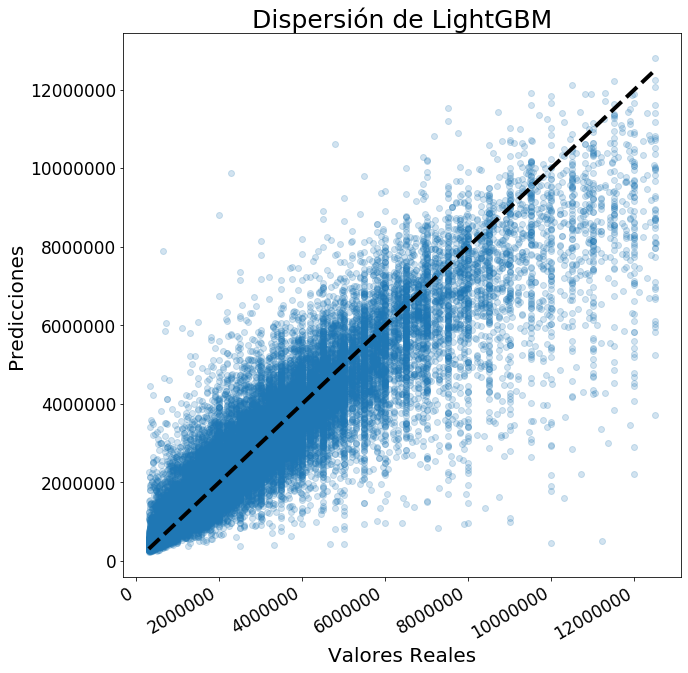

In [54]:
ver_dispersion(y_test, pred, "LightGBM")

### Para generar un submit: si ya se tiene algo potable para subir, en vez de entrenar con el set reducido (como arriba), se puede generar un .csv para la subida con el código de más abajo.

In [ ]:
%%time
y_l = np.log(y)
reg = #ACA VA EL TRAIN DEL ALGORITMO CORRESPONDIENTE

In [ ]:
%%time 
pred_test = #ACA VA EL TEST DEL ALGORITMO CORRESPONDIENTE
pred_test = np.exp(pred_test)

In [ ]:
ids_test = pd.read_csv(f"{ruta_data}/ids_test.csv")

ids_test["target"] = pred_test

#### Ponele algun nombre al csv

In [ ]:
ids_test.to_csv(f"{ruta_submits}/INDICAR_ACA_UN_NOMBRE.csv",index=False)